# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Data Exploration 

## Load the CSV file

In [2]:
file_path = 'customer_data.csv' 
df = pd.read_csv(file_path)

## Check for missing values

In [3]:
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_data / len(df)) * 100

## Plot missing values (Top 20 columns)

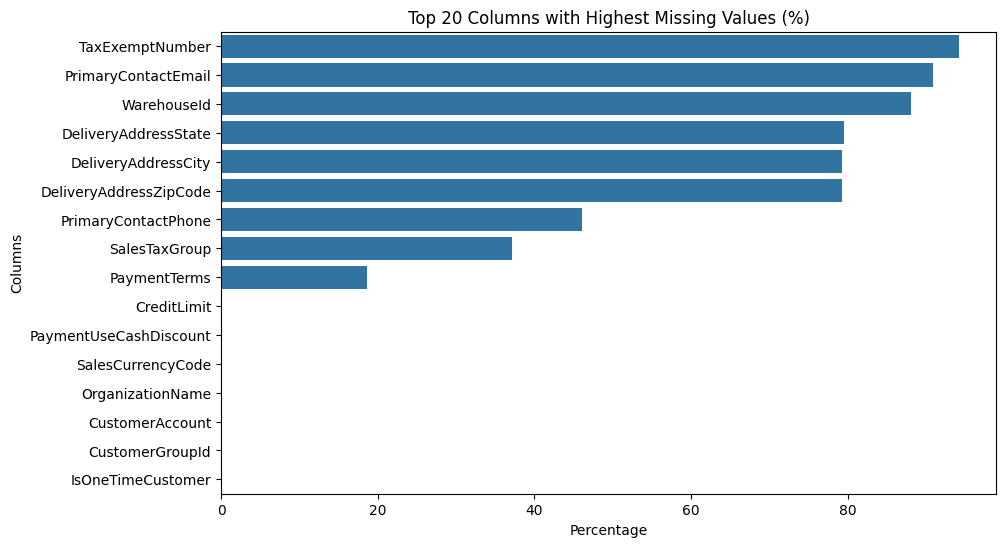

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x=missing_percentage[:20], y=missing_percentage[:20].index)
plt.title('Top 20 Columns with Highest Missing Values (%)')
plt.xlabel('Percentage')
plt.ylabel('Columns')
plt.show()

## Filter only numerical columns for correlation matrix

In [5]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.head()

,CreditLimit
0,0
1,0
2,0
3,0
4,0


## Correlation matrix for numerical fields


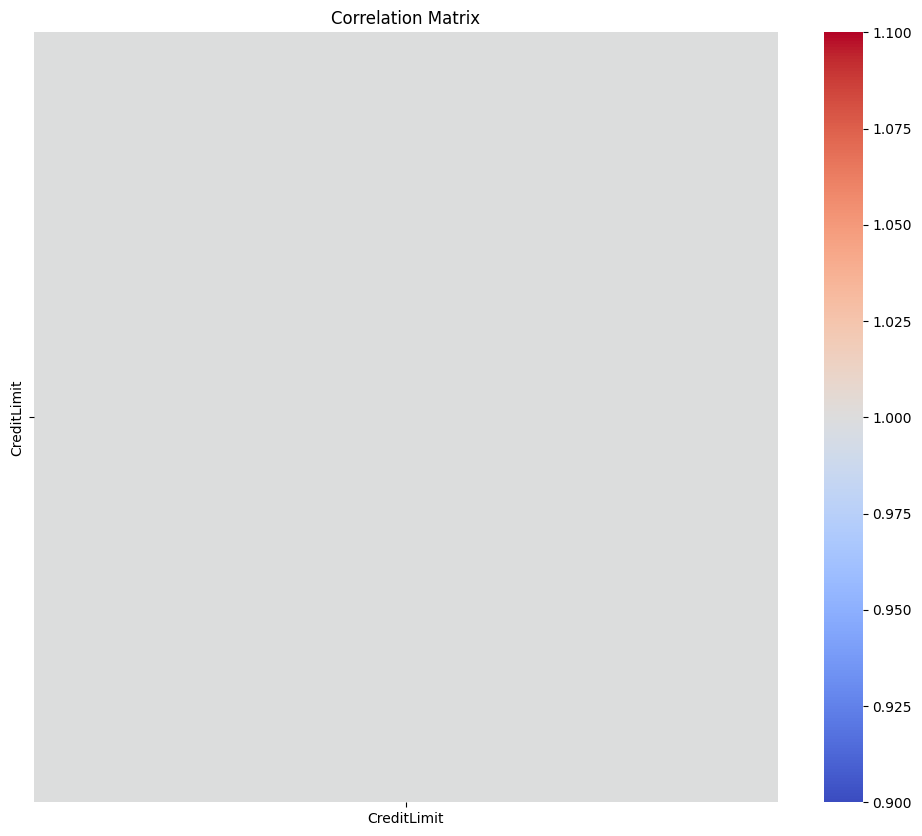

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Checking null values

In [7]:
missing_values = df.isnull().sum()

In [8]:
missing_percentage = (missing_values / len(df)) * 100

In [9]:
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 CustomerAccount             0
OrganizationName            0
CustomerGroupId             0
SalesCurrencyCode           0
PaymentTerms               61
CreditLimit                 0
PaymentUseCashDiscount      0
TaxExemptNumber           309
IsOneTimeCustomer           0
SalesTaxGroup             122
WarehouseId               289
DeliveryAddressCity       260
DeliveryAddressState      261
DeliveryAddressZipCode    260
PrimaryContactEmail       298
PrimaryContactPhone       151
dtype: int64

Percentage of Missing Data:
 CustomerAccount            0.000000
OrganizationName           0.000000
CustomerGroupId            0.000000
SalesCurrencyCode          0.000000
PaymentTerms              18.597561
CreditLimit                0.000000
PaymentUseCashDiscount     0.000000
TaxExemptNumber           94.207317
IsOneTimeCustomer          0.000000
SalesTaxGroup             37.195122
WarehouseId               88.109756
DeliveryAddressCity       79.268293
DeliveryAddre

In [10]:
data_filtered = df[
    [
        "CustomerAccount",
        "OrganizationName",
        "CustomerGroupId",
        "SalesCurrencyCode",
        "PaymentTerms",
        "CreditLimit",
        "SalesTaxGroup",
        "WarehouseId",
    ]
]

In [11]:
print("\nMissing values in each column after removal:")
print(data_filtered.isnull().sum())


Missing values in each column after removal:
CustomerAccount        0
OrganizationName       0
CustomerGroupId        0
SalesCurrencyCode      0
PaymentTerms          61
CreditLimit            0
SalesTaxGroup        122
WarehouseId          289
dtype: int64


In [12]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerAccount    328 non-null    object
 1   OrganizationName   328 non-null    object
 2   CustomerGroupId    328 non-null    object
 3   SalesCurrencyCode  328 non-null    object
 4   PaymentTerms       267 non-null    object
 5   CreditLimit        328 non-null    int64 
 6   SalesTaxGroup      206 non-null    object
 7   WarehouseId        39 non-null     object
dtypes: int64(1), object(7)
memory usage: 20.6+ KB


## Checking Unique Values for  each column

In [13]:
data_filtered["SalesTaxGroup"].unique()

array(['WA', 'UT', 'MI', 'TX', 'CO', 'OR', 'MA', 'NY', 'CA', 'FL', 'MD',
       'IL', 'NV', 'OH', 'GA', 'DC', 'ID', 'MN', 'PA', 'TN', 'EXMPT FOR',
       'AR-DOM', 'No-Tax', 'AR-EU', 'Resale', 'IA', nan, 'НДС',
       'VATGroup', 'BusinesTax', 'VE-DOM', 'EXEMPTFOR', 'CALA', 'IT_DOM',
       'IT_PA'], dtype=object)

In [14]:
data_filtered["CreditLimit"].unique()

array([       0,   500000,   400000,   250000,    20000,  1000000,
         100000,   100100,   350000,   150000,   200000,     1500,
             10,     5000,     2000,     1000, 10000000])

In [15]:
data_filtered["WarehouseId"].unique()

array([nan, '24', 'DC-CENTRAL', 'DC-WEST', 'DC-EAST', 'DC', '12',
       'DC-FRRT', 'Москва'], dtype=object)

In [16]:
data_filtered["CustomerGroupId"].unique()

array(['20', '90', '30', '10', '100', 'CG04', 'CG02', 'CG01', 'CG03',
       'Орг', '010', '60', '40', '80', '020', '50', '70', 'Физик', 'STD'],
      dtype=object)

# Data Preprocessing

## Load the dataset

In [17]:
customer_data = pd.read_csv('Customer_data.csv')

## Selecting relevant features and target

In [18]:
X = customer_data[['CreditLimit', 'SalesTaxGroup', 'WarehouseId']]
y = customer_data['CustomerGroupId']

## Handling missing values

In [19]:
X.fillna('Missing', inplace=True)

C:\Users\localadmin\AppData\Local\Temp\2\ipykernel_10672\1886037138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna('Missing', inplace=True)


## One-hot encode categorical features and scale numerical features

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['CreditLimit']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['SalesTaxGroup', 'WarehouseId'])
    ])

# Build , Train Predict & Evaluate the model

## Logistic Regression model 

In [21]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

## Splitting the data into training and test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Train the model

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditLimit']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SalesTaxGroup',
                                                   'WarehouseId'])])),
                ('classifier', LogisticRegression())])

## Make predictions

In [24]:
y_pred = model.predict(X_test)

## Evaluate the model

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         010       0.00      0.00      0.00         3
          10       0.00      0.00      0.00        14
          20       0.52      0.98      0.68        44
          30       0.57      0.31      0.40        26
          50       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         2
          70       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1
          90       0.00      0.00      0.00         2
        CG01       0.00      0.00      0.00         1
        CG03       0.00      0.00      0.00         1
        CG04       0.00      0.00      0.00         1
         STD       0.00      0.00      0.00         1
         Орг       1.00      1.00      1.00         1

    accuracy                           0.53        99
   macro avg       0.15      0.16      0.15        99
weighted avg       0.39      0.53      0.42        99



c:\Dynamics365Commerce\D365-Data-Analysis\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Dynamics365Commerce\D365-Data-Analysis\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Dynamics365Commerce\D365-Data-Analysis\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

# Generate confusion matrix

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  0  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  2 16  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]]


# Create a heatmap to visualize the confusion matrix

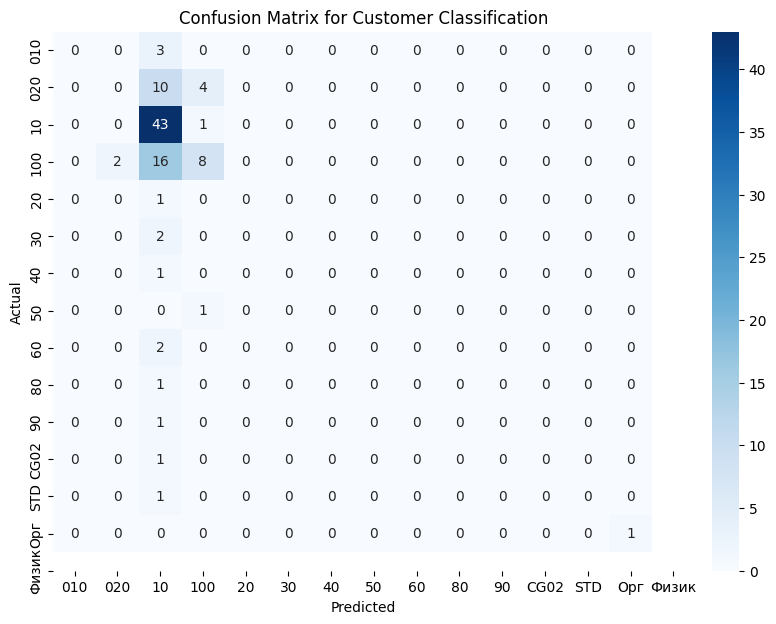

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for Customer Classification')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()